In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exp. KNN+PCA con alpha = n vs KNN

```exp_args = {"ALPHA": 1497, # 1497 = 0.1 * #vocabs
            "CANT_K": 15,
            "MIN_K": 1,
            "MAX_K": 200,
            "VOCAB_FILE": "../data/vocab.csv",
            "TRAINING_FILE": "../data/imdb_tokenized.csv",
            "TESTING_FILE": "../data/imdb_tokenized.csv",
            "CACHE_FOLDER": "../cache/",
            "NUMBER_OF_TRAINING_ENTRIES": 25000,
            "NUMBER_OF_TESTING_ENTRIES": 2000,
            "MAX_VOCAB_FREQ": 0.1}```

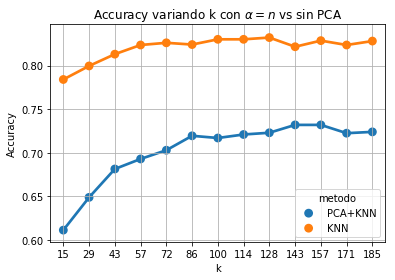

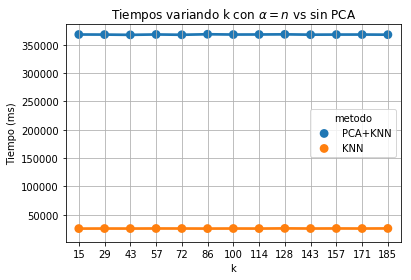

In [47]:
df = pd.read_csv('res_pca_n_vs_sin_pca_1_200.csv', engine='python')

ax = sns.pointplot(x="k", y="accuracy", hue="metodo", data=df)
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
ax.set_title(r"Accuracy variando k con $\alpha=n$ vs sin PCA")
ax.grid()

plt.savefig('img/accuracy-pca-n-vs-sin-pca.png', bbox_inches = "tight")
plt.show()

ax = sns.pointplot(x="k", y="tiempo", hue="metodo", data=df)
ax.set_xlabel("k")
ax.set_ylabel("Tiempo (ms)")
ax.set_title(r"Tiempos variando k con $\alpha=n$ vs sin PCA")
ax.grid()

plt.savefig('img/tiempos-pca-n-vs-sin-pca.png', bbox_inches = "tight")
plt.show()

Exp. variando maximum vocabs. freq.

```exp_args = {"ALPHA": 200, # 1497 = 0.1 * #vocabs
            "K": 50,
            "VOCAB_FILE": "../data/vocab.csv",
            "TRAINING_FILE": "../data/imdb_tokenized.csv",
            "TESTING_FILE": "../data/imdb_tokenized.csv",
            "CACHE_FOLDER": "../cache/",
            "NUMBER_OF_TRAINING_ENTRIES": 25000,
            "NUMBER_OF_TESTING_ENTRIES": 2000,
            "MIN_MAX_VOCAB_FREQ": 0.0,
            "MAX_MAX_VOCAB_FREQ": 0.8,
            "CANT_MAX_VOCAB_FREQ": 15}```

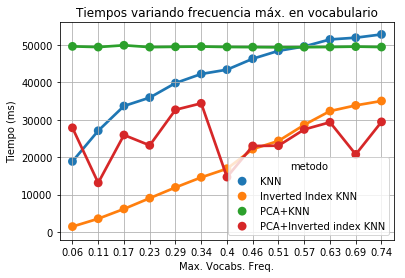

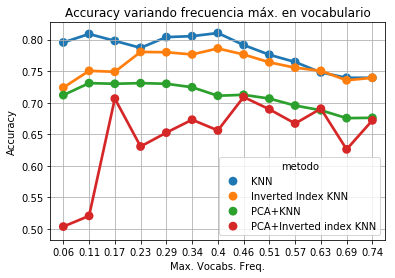

In [53]:
df = pd.read_csv('tiempos_var_max_vocabs_freq-0.0_0.8.csv', engine='python')
df['max_vocab_freq'] = df['max_vocab_freq'].apply(lambda x: round(x,2))

ax = sns.pointplot(x="max_vocab_freq", y="tiempo", hue="metodo", data=df)
ax.set_xlabel("Max. Vocabs. Freq.")
ax.set_ylabel("Tiempo (ms)")
ax.set_title("Tiempos variando frecuencia máx. en vocabulario")
ax.grid()
# plt.locator_params(nbins=5)

plt.savefig('img/tiempos-variando-max-vocabs-freq.png', bbox_inches = "tight")
plt.show()

ax = sns.pointplot(x="max_vocab_freq", y="accuracy", hue="metodo", data=df)
ax.set_xlabel("Max. Vocabs. Freq.")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy variando frecuencia máx. en vocabulario")
ax.grid()

plt.savefig('img/accuracy-variando-max-vocabs-freq.png', bbox_inches = "tight")
plt.show()

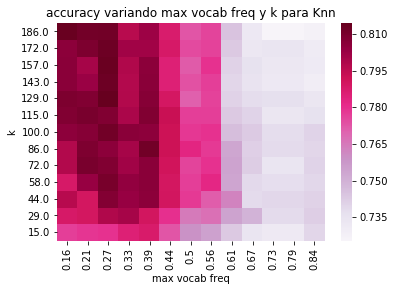

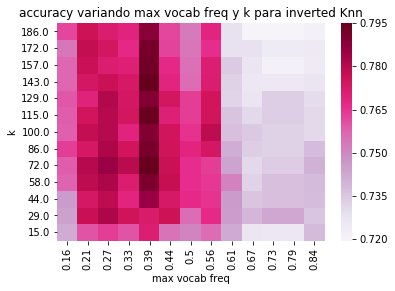

In [2]:
df = pd.read_csv('res_knn_knninverted_var_k-1_200.csv', engine='python')
df["k"] = np.around(df["k"], decimals=0)
df["max_vocab_freq"] = np.around(df["max_vocab_freq"], decimals=2)
df1 = df.loc[df['metodo'] == "KNN"]
df2 = df.loc[df['metodo'] == "Inverted Index KNN"]


cant_nodos = df["accuracy"]
ax = sns.heatmap(data = df1.groupby(['k','max_vocab_freq'], as_index=False).mean().pivot('k','max_vocab_freq', 'accuracy'),cmap="PuRd")
ax.set_title("accuracy variando max vocab freq y k para Knn".format(df["accuracy"]))
ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.xlabel(r'max vocab freq')
plt.ylabel(r'k')
plt.savefig('img/accuracy-variando-max-vocab-k.png', bbox_inches = "tight")
plt.show()

cant_nodos = df["accuracy"]
ax = sns.heatmap(data = df2.groupby(['k','max_vocab_freq'], as_index=False).mean().pivot('k','max_vocab_freq', 'accuracy'),cmap="PuRd")
ax.set_title("accuracy variando max vocab freq y k para inverted Knn".format(df["accuracy"]))
ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.xlabel(r'max vocab freq')
plt.ylabel(r'k')
plt.savefig('img/accuracy-variando-max-vocab-k-inverted.png', bbox_inches = "tight")
plt.show()


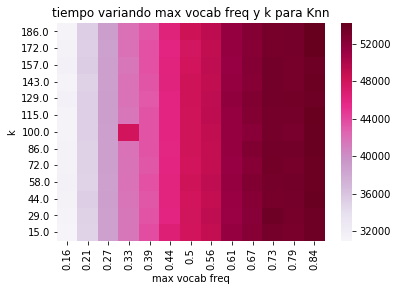

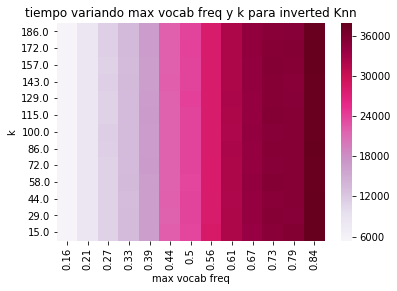

In [3]:
df = pd.read_csv('res_knn_knninverted_var_k-1_200.csv', engine='python')
df["k"] = np.around(df["k"], decimals=0)
df["max_vocab_freq"] = np.around(df["max_vocab_freq"], decimals=2)
df1 = df.loc[df['metodo'] == "KNN"]
df2 = df.loc[df['metodo'] == "Inverted Index KNN"]


cant_nodos = df["tiempo"]
ax = sns.heatmap(data = df1.groupby(['k','max_vocab_freq'], as_index=False).mean().pivot('k','max_vocab_freq', 'tiempo'),cmap="PuRd")
ax.set_title("tiempo variando max vocab freq y k para Knn".format(df["tiempo"]))
ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.xlabel(r'max vocab freq')
plt.ylabel(r'k')
plt.savefig('img/tiempo-variando-max-vocab-k.png', bbox_inches = "tight")
plt.show()

cant_nodos = df["tiempo"]
ax = sns.heatmap(data = df2.groupby(['k','max_vocab_freq'], as_index=False).mean().pivot('k','max_vocab_freq', 'tiempo'),cmap="PuRd")
ax.set_title("tiempo variando max vocab freq y k para inverted Knn".format(df["tiempo"]))
ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.xlabel(r'max vocab freq')
plt.ylabel(r'k')
plt.savefig('img/tiempo-variando-max-vocab-k-inverted.png', bbox_inches = "tight")
plt.show()